In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import requests

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# get api from https://api.sportsdata.io/v3/nfl/scores/json/PlayersByAvailable?key=
load_dotenv()
API_KEY = os.getenv("API_KEY")

season = "2024REG"
player_id = 18878
number_of_games = "all"

r = requests.get(
    f"https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/{season}?key={API_KEY}"
)

# get json data
data = r.json()

# check if the request was successful
if r.status_code == 200:
    # create dataframe
    df = pd.DataFrame(data)
else:
    error_message = data.get("message")
    print(f"Error: {error_message}")
    df = pd.DataFrame()  # create an empty dataframe

print(df.head())

   PlayerID  SeasonType  Season Team  Number        Name Position  \
0       549           1    2024  ARI       5    M.Prater        K   
1       611           1    2024  IND      15    J.Flacco       QB   
2      2593           1    2024  NYJ       8   A.Rodgers       QB   
3      3061           1    2024  CHI      84     M.Lewis       TE   
4      3341           1    2024  MIA      93  C.Campbell       DT   

  PositionCategory  Activated  Played  Started  PassingAttempts  \
0               ST          4       4        0              0.0   
1              OFF          8       8        6            423.3   
2              OFF         17      17       17            996.9   
3              OFF         17      17        3              0.0   
4              DEF         17      17       17              0.0   

   PassingCompletions  PassingYards  PassingCompletionPercentage  \
0                 0.0           0.0                          0.0   
1               276.5        3006.0           

In [4]:
# get all RBs
rbs = df[df['Position'] == 'RB']
print(rbs[["Name", "Position", "Team"]])

                   Name Position Team
63          C.Patterson       RB  PIT
126          A.Abdullah       RB   LV
159           R.Mostert       RB  MIA
181           E.Elliott       RB  DAL
194             D.Henry       RB  BAL
273             J.Mixon       RB  HOU
274              D.Cook       RB  DAL
277         C.McCaffrey       RB   SF
278            A.Kamara       RB   NO
313              K.Hunt       RB   KC
321           D.Foreman       RB  CLE
335            J.Conner       RB  ARI
339            S.Perine       RB   KC
341          J.Williams       RB   NO
356             A.Jones       RB  MIN
362         J.McNichols       RB  WAS
404            A.Ekeler       RB  WAS
408        D.Ogunbowale       RB  HOU
413           S.Barkley       RB  PHI
416             N.Chubb       RB  CLE
510             J.Kelly       RB  CLE
554             M.Boone       RB  CAR
560           G.Edwards       RB  LAC
570        J.Wilson Jr.       RB  MIA
614            M.Gaskin       RB  MIN
623         

In [5]:
# get Derrick Henry
# input_name = input("Enter player name: ")
input_name = "D. Henry"
search_name = df.loc[
    df["Name"] == input_name, ["Name", "Position", "Team", "RushingYards", "RushingTouchdowns"]
]
print(search_name)

Empty DataFrame
Columns: [Name, Position, Team, RushingYards, RushingTouchdowns]
Index: []


In [6]:
# import beautifulsoup4
from bs4 import BeautifulSoup

In [7]:
# get the url

new_season = "2020"

url = f"https://www.nfl.com/stats/player-stats/category/rushing/{new_season}/REG/all/rushingyards/desc"

page = requests.get(url)

print(page.status_code)

# create a BeautifulSoup object
soup = BeautifulSoup(page.content, "html.parser")

# get the table
table = soup.find("table")

# get the table headers
headers = table.find_all("th")

# get the table rows
rows = table.find_all("tr")

# get the table data
data = table.find_all("td")

# get the table headers
header_list = []

for header in headers:
    header_list.append(header.text)
    # remove /n from the list
    header_list = [header.strip() for header in header_list]

# get the table data
data_list = []

for item in data:
    data_list.append(item.text)
    # remove /n from the list
    data_list = [data.strip() for data in data_list]

# group eveery 10 items in data_list
data_list = [data_list[i:i+10] for i in range(0, len(data_list), 10)]

# create a dataframe
df = pd.DataFrame(data_list, columns=header_list)

print(df)



200
                   Player Rush Yds  Att  TD 20+ 40+ Lng Rush 1st Rush 1st%  \
0           Derrick Henry     2027  378  17  16   4  94       98      25.9   
1             Dalvin Cook     1557  312  16   6   1  70       91      29.2   
2         Jonathan Taylor     1169  232  11   7   3  62       69      29.7   
3             Aaron Jones     1104  201   9   6   4  77       52      25.9   
4        David Montgomery     1070  247   8   5   2  80       59      23.9   
5          James Robinson     1070  240   7   5   1  47       54      22.5   
6              Nick Chubb     1067  190  12  12   3  59       55        29   
7             Josh Jacobs     1065  273  12   3   0  28       61      22.3   
8           Lamar Jackson     1005  159   7  10   2  50       56      35.2   
9           Melvin Gordon      986  215   9   5   2  65       46      21.4   
10        Ezekiel Elliott      979  244   6   3   0  31       62      25.4   
11           Ronald Jones      978  192   7   6   1  98     

In [8]:
g_list = []

In [9]:

fox_season = 2018
while fox_season < 2025:
    fox_season = str(fox_season)
    fox_url = f"https://www.foxsports.com/nfl/stats?category=rushing&sort=ru_yds&season={fox_season}&seasonType=reg&sortOrder=desc"

    page = requests.get(fox_url)

    print(page.status_code)

    # create a BeautifulSoup object
    soup = BeautifulSoup(page.content, "html.parser")

    # get the table
    table = soup.find("table")

    # get the table headers
    headers = table.find_all("th")

    table_data = soup.find_all("td")

    start_list = []

    for data in table_data:
        start_list.append(data.text)
        # remove /n from the list
        start_list = [g.strip() for g in start_list]
        start_list = [g.replace("\n", "") for g in start_list]


    start_list = [start_list[i : i + 14] for i in range(0, len(start_list), 14)]


    # replace empty space in every 2nd element in the list of lists with a -
    start_list = [[g.replace("      ", " - ") for g in start_list] for start_list in start_list]

    # drop the first element in the list of lists
    start_list = [start_list[1:] for start_list in start_list]

    # split the first element in the list of lists by -
    for g in start_list:
        temp_list = []
        g[0] = g[0].split(" - ")
        # place the first two element in the list of lists in a temporary list
        temp_list.append(g[0][0:])
        # remove the first two element in the list of lists
        g.pop(0)
        # place each element in the temporary list in the list of lists
        g.insert(0,fox_season)
        for i in temp_list:
            for j in i:
                g.insert(1, j)

    print(start_list)

    header_list2 = []

    for header in headers:
        header_list2.append(header.text)
        # remove /n from the list
        header_list2 = [header.strip() for header in header_list2]

    header_list2.insert(0, "TEAM")
    header_list2.insert(0, "YEAR")

    # add each element of start_list to g_list
    for g in start_list:
        g_list.insert(0,g)

    print(g_list)

    fox_season = int(fox_season)
    fox_season += 1

# create a dataframe
df = pd.DataFrame(g_list, columns=header_list2)

print(df)

200
[['2018', 'DAL', 'Ezekiel Elliott', '15', '15', '304', '20.3', '1,434', '4.7', '95.6', '6', '41', '8', '6', '1'], ['2018', 'NYG', 'Saquon Barkley', '16', '16', '261', '16.3', '1,307', '5.0', '81.7', '11', '78', '7', '0', '0'], ['2018', 'LAR', 'Todd Gurley II', '14', '14', '256', '18.3', '1,251', '4.9', '89.4', '17', '36', '7', '1', '1'], ['2018', 'CIN', 'Joe Mixon', '14', '13', '237', '16.9', '1,168', '4.9', '83.4', '8', '51', '4', '0', '0'], ['2018', 'SEA', 'Chris Carson', '14', '14', '247', '17.6', '1,151', '4.7', '82.2', '9', '61', '6', '3', '2'], ['2018', 'CAR', 'Christian McCaffrey', '16', '16', '219', '13.7', '1,098', '5.0', '68.6', '7', '59', '4', '4', '1'], ['2018', 'TEN', 'Derrick Henry', '16', '12', '215', '13.4', '1,059', '4.9', '66.2', '12', '99', '2', '1', '1'], ['2018', 'WAS', 'Adrian Peterson', '16', '16', '251', '15.7', '1,042', '4.2', '65.1', '7', '90', '3', '3', '2'], ['2018', 'DEN', 'Phillip Lindsay', '15', '8', '192', '12.8', '1,037', '5.4', '69.1', '9', '65', '

In [10]:
# convert the RYDS, GP, GS, RATT, ATT/G, RAVG, RYDS/G columns to appropriate types
df["RYDS"] = df["RYDS"].astype(str).str.replace(",", "").astype(int)
df["GP"] = df["GP"].astype(int)
df["GS"] = df["GS"].astype(int)
df["RATT"] = df["RATT"].astype(str).str.replace(",", "").astype(float)
df["ATT/G"] = df["ATT/G"].astype(str).str.replace(",", "").astype(float)
df["RAVG"] = df["RAVG"].astype(str).str.replace(",", "").astype(float)
df["RYDS/G"] = df["RYDS/G"].astype(str).str.replace(",", "").astype(float)

# sort the dataframe by RushingYards
df = df.sort_values(by="RYDS", ascending=False)

# remove duplicate rows where the player has the same Name keep the highest RYDS row
df = df.drop_duplicates(subset="PLAYERS", keep="first")

# reset the index
df = df.reset_index(drop=True)

print(df)


    YEAR TEAM                PLAYERS  GP  GS   RATT  ATT/G  RYDS  RAVG  \
0   2020  TEN          Derrick Henry  16  16  378.0   23.6  2027   5.4   
1   2024  PHI         Saquon Barkley  16  16  345.0   21.6  2005   5.8   
2   2021  IND        Jonathan Taylor  17  17  332.0   19.5  1811   5.5   
3   2022   LV            Josh Jacobs  17  17  340.0   20.0  1653   4.9   
4   2020  MIN            Dalvin Cook  14  14  312.0   22.3  1557   5.0   
5   2022  CLE             Nick Chubb  17  17  302.0   17.8  1525   5.0   
6   2023   SF    Christian McCaffrey  16  16  272.0   17.0  1459   5.4   
7   2024  ATL         Bijan Robinson  17  17  304.0   17.9  1456   4.8   
8   2018  DAL        Ezekiel Elliott  15  15  304.0   20.3  1434   4.7   
9   2024  DET           Jahmyr Gibbs  17   4  250.0   14.7  1412   5.6   
10  2024  LAR         Kyren Williams  16  16  316.0   19.8  1299   4.1   
11  2022  CAR          Miles Sanders  17  15  259.0   15.2  1269   4.9   
12  2018  LAR         Todd Gurley II  

In [11]:
nfc_teams = ["ATL", "CAR", "NO", "TB", "DAL", "NYG", "PHI", "WAS", "CHI", "DET", "GB", "MIN", "ARI", "LAR", "SF", "SEA"]
afc_teams = ["BAL", "CIN", "CLE", "PIT", "BUF", "MIA", "NE", "NYJ", "HOU", "IND", "JAX", "TEN", "DEN", "KC", "LAC", "LV"]

In [12]:
# AfC teams
afc_df = df[df["TEAM"].isin(afc_teams)]

# NFC teams
nfc_df = df[df["TEAM"].isin(nfc_teams)]

print(afc_df)
print(nfc_df)


    YEAR TEAM                PLAYERS  GP  GS   RATT  ATT/G  RYDS  RAVG  \
0   2020  TEN          Derrick Henry  16  16  378.0   23.6  2027   5.4   
2   2021  IND        Jonathan Taylor  17  17  332.0   19.5  1811   5.5   
3   2022   LV            Josh Jacobs  17  17  340.0   20.0  1653   4.9   
5   2022  CLE             Nick Chubb  17  17  302.0   17.8  1525   5.0   
14  2019  BAL          Lamar Jackson  15  15  176.0   11.7  1206   6.9   
15  2021  CIN              Joe Mixon  16  16  292.0   18.3  1205   4.1   
16  2021  PIT           Najee Harris  17  17  307.0   18.1  1200   3.9   
18  2019  JAX      Leonard Fournette  15  15  265.0   17.7  1152   4.3   
21  2022  JAX     Travis Etienne Jr.  17  12  220.0   12.9  1125   5.1   
22  2023  BUF             James Cook  17  13  237.0   13.9  1122   4.7   
26  2019  IND            Marlon Mack  14  12  247.0   17.6  1091   4.4   
27  2024  TEN           Tony Pollard  16  16  260.0   16.3  1079   4.2   
29  2020  JAX         James Robinson  

#### Data retrieved from Sports Reference LLC. (n.d.). Pro Football Reference. Retrieved January 24, 2025, from https://www.pro-football-reference.com/


In [13]:
# import csv from nfl-data-study/data/raw/rb_rushing2024.csv
new_df = pd.read_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/raw/rb_rushing2024.csv"
)

# check the data types
new_df.info()

# drop the Rk column
new_df = new_df.drop(columns=["Awards","-9999"])

# short the dataframe by Yds
# new_df = new_df.sort_values(by="Yds", ascending=False)

new_df

# add a 'Year' column if it does not exist
if 'Year' not in new_df.columns:
    new_df['Year'] = 0

# iterate through the dataframe and while the Rank is less than 30, set the Year to 2024. Once the Rank hits 1 again, set the Year to 1 less than the previous Year
year = 2024
for index, row in new_df.iterrows():
    if row["Rk"] <= 30:
        new_df.loc[index, "Year"] = year
        if (row["Rk"] == 1 and index != 0):
            new_df.loc[index, "Year"] = year - 1
            year -= 1

        



new_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      312 non-null    int64  
 1   Player  312 non-null    object 
 2   Age     312 non-null    int64  
 3   Team    312 non-null    object 
 4   Pos     312 non-null    object 
 5   G       312 non-null    int64  
 6   GS      312 non-null    int64  
 7   Att     312 non-null    int64  
 8   Yds     312 non-null    int64  
 9   TD      312 non-null    int64  
 10  1D      312 non-null    int64  
 11  Succ%   312 non-null    float64
 12  Lng     312 non-null    int64  
 13  Y/A     312 non-null    float64
 14  Y/G     312 non-null    float64
 15  A/G     312 non-null    float64
 16  Fmb     312 non-null    int64  
 17  Awards  84 non-null     object 
 18  -9999   312 non-null    object 
dtypes: float64(4), int64(10), object(5)
memory usage: 46.4+ KB


,Rk,Player,Age,Team,Pos,G,GS,Att,Yds,TD,1D,Succ%,Lng,Y/A,Y/G,A/G,Fmb,Year
0,1,Saquon Barkley,27,PHI,RB,16,16,345,2005,13,82,52.5,72,5.8,125.3,21.6,2,2024
1,2,Derrick Henry,30,BAL,RB,17,17,325,1921,16,94,58.8,87,5.9,113.0,19.1,3,2024
2,3,Kyren Williams,24,LAR,RB,16,16,316,1299,14,85,50.9,30,4.1,81.2,19.8,5,2024
3,4,Bijan Robinson,22,ATL,RB,17,17,304,1456,14,82,60.2,37,4.8,85.6,17.9,1,2024
4,5,Jonathan Taylor,25,IND,RB,14,13,303,1431,11,71,45.9,70,4.7,102.2,21.6,4,2024
5,6,Josh Jacobs,26,GNB,RB,17,17,301,1329,15,73,52.2,38,4.4,78.2,17.7,4,2024
6,7,Najee Harris,26,PIT,RB,17,17,263,1043,6,50,43.7,36,4.0,61.4,15.5,0,2024
7,8,Tony Pollard,27,TEN,RB,16,16,260,1079,5,53,47.7,41,4.2,67.4,16.3,2,2024
8,9,Aaron Jones,30,MIN,RB,17,17,255,1138,5,49,49.8,41,4.5,66.9,15.0,5,2024
9,10,D'Andre Swift,25,CHI,RB,17,17,253,959,6,43,43.9,56,3.8,56.4,14.9,2,2024


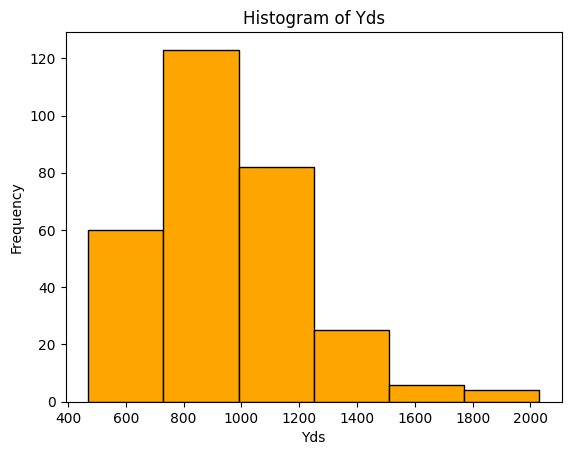

In [14]:
# keep only 300 rows
# new_df = new_df.iloc[:300]

# drop bins column
# new_df = new_df.drop(columns=["bins"])

# export the dataframe to a csv file
new_df.to_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/processed/raw_rb_rushing.csv",
    index=False,
)


# Define the number of bins (classes)
num_bins = 6

# Choose a quantitative variable, for example, 'RYDS'
quant_variable = "Yds"

# Create bins and get the frequency counts at equal intervals
new_df["bins"] = pd.cut(
    new_df[quant_variable], bins=num_bins, include_lowest=True, precision=0
)
frequency_table = new_df["bins"].value_counts().sort_index()

# create table of the frequency counts
frequency_table = pd.DataFrame(frequency_table)
frequency_table.columns = ["Frequency"]
frequency_table["Ranges"] = frequency_table.index
frequency_table = frequency_table.reset_index(drop=True)

# round the lower and upper limits to the nearest tens place and format as string
frequency_table["Ranges"] = (
    frequency_table["Ranges"]
    .astype(str)
    .str.replace("(", "")
    .str.replace("]", "")
    .str.replace(",", "-")
    .str.replace(" ", "")
)
frequency_table["Ranges"] = (
    frequency_table["Ranges"]
    .str.split("-")
    .apply(lambda x: [round(float(i), -1) for i in x])
)
# make a column of the lower limits
frequency_table["Lower_Limit"] = frequency_table["Ranges"].apply(lambda x: x[0])
# make a column of the upper limits
frequency_table["Upper_Limit"] = frequency_table["Ranges"].apply(lambda x: x[1])
# drop the Ranges column
frequency_table = frequency_table.drop(columns=["Ranges"])
# sort the dataframe by the lower limits
frequency_table = frequency_table.sort_values(by="Lower_Limit")
# rearrange the columns
frequency_table = frequency_table[["Lower_Limit", "Upper_Limit", "Frequency"]]
# set the index to the Lower_Limit
frequency_table = frequency_table.set_index("Lower_Limit")

plt.hist(
    new_df[quant_variable],
    bins=num_bins,
    color="orange",
    edgecolor="black",
    range=(470, 2030),
)
plt.xlabel(quant_variable)
plt.ylabel("Frequency")
plt.title(f"Histogram of {quant_variable}")
plt.show()

# export the frequency table to a csv file
frequency_table.to_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/processed/frequency_table.csv"
)

### Randomly Select 60 Players

In [15]:
# Take a random sample of 60 players from new_df
sample_data = new_df.sample(n=60, random_state=1)

# Keep only the 'Name','Yds', and 'Team' columns
sample_data = sample_data[['Player', 'Yds', 'Team', 'Year']]

# sort the dataframe by Yds
sample_data = sample_data.sort_values(by="Yds", ascending=False)

# Display the new dataframe
print(sample_data)

                 Player   Yds Team  Year
125         Dalvin Cook  1557  MIN  2020
154       Derrick Henry  1540  TEN  2019
4       Jonathan Taylor  1431  IND  2024
187      Saquon Barkley  1307  NYG  2018
221         Todd Gurley  1305  LAR  2017
257        Le'Veon Bell  1268  PIT  2016
11        Chuba Hubbard  1195  CAR  2024
131     Jonathan Taylor  1169  IND  2020
230         Mark Ingram  1124  NOR  2017
162         Marlon Mack  1091  IND  2019
165         Carlos Hyde  1070  HOU  2019
287         Chris Ivory  1070  NYJ  2015
95       Antonio Gibson  1037  WAS  2021
12            Joe Mixon  1016  HOU  2024
169     Phillip Lindsay  1011  DEN  2019
18           James Cook  1009  BUF  2024
266         Carlos Hyde   988  SFO  2016
227     Ezekiel Elliott   983  DAL  2017
286          Frank Gore   967  IND  2015
225          Frank Gore   961  IND  2017
9         D'Andre Swift   959  CHI  2024
51        Isiah Pacheco   935  KAN  2023
267        Spencer Ware   921  KAN  2016
105       Austin

In [16]:
sample_summary = sample_data.describe().drop(columns=["Year"])

# Display the summary statistics
print(sample_summary)

# export summary statistics to a csv file
sample_summary.to_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/processed/sample_summary.csv"
)

# export the sample data to a csv file
sample_data.to_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/processed/sample_data.csv",
    index=False,
)

               Yds
count    60.000000
mean    893.000000
std     240.271174
min     465.000000
25%     724.000000
50%     886.000000
75%    1009.500000
max    1557.000000


### Sample Ferequency Table & Histogram

['460 - 730', '640 - 910', '820 - 1090', '1010 - 1280', '1190 - 1460', '1370 - 1640']


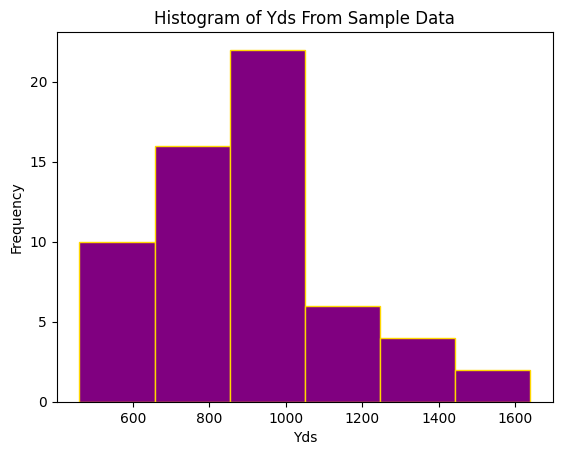

In [17]:
import math
# Define the number of bins (classes)
num_bins = 6

# Choose a quantitative variable, for example, 'RYDS'
quant_variable = "Yds"

# Create bins and get the frequency counts at equal intervals
sample_data["bins"] = pd.cut(
    sample_data[quant_variable], bins=num_bins, include_lowest=True, precision=0
)
sample_frequency_table = sample_data["bins"].value_counts().sort_index()

# create table of the frequency counts
sample_frequency_table = pd.DataFrame(sample_frequency_table)
sample_frequency_table.columns = ["Frequency"]
sample_frequency_table["Ranges"] = sample_frequency_table.index
sample_frequency_table = sample_frequency_table.reset_index(drop=True)

# round the lower and upper limits to the nearest tens place and format as string
sample_frequency_table["Ranges"] = (
    sample_frequency_table["Ranges"]
    .astype(str)
    .str.replace("(", "")
    .str.replace("]", "")
    .str.replace(",", "-")
    .str.replace(" ", "")
)
sample_frequency_table["Ranges"] = (
    sample_frequency_table["Ranges"]
    .str.split("-")
    .apply(lambda x: [math.floor(float(i)/10)*10 for i in x])
)
# make a column of the lower limits
sample_frequency_table["Lower_Limit"] = sample_frequency_table["Ranges"].apply(lambda x: x[0])
# make a column of the upper limits
sample_frequency_table["Upper_Limit"] = sample_frequency_table["Ranges"].apply(lambda x: x[1]) 
# make sure the upper limit - the lower limit is 250
sample_frequency_table["Upper_Limit"] = sample_frequency_table["Lower_Limit"] + 270
# drop the Ranges column
sample_frequency_table = sample_frequency_table.drop(columns=["Ranges"])
# sort the dataframe by the lower limits
sample_frequency_table = sample_frequency_table.sort_values(by="Lower_Limit")
# rearrange the columns
sample_frequency_table = sample_frequency_table[["Lower_Limit", "Upper_Limit", "Frequency"]]
# set the index to the Lower_Limit
sample_frequency_table = sample_frequency_table.set_index("Lower_Limit")

lower_list = list(sample_frequency_table.index)
upper_list = list(sample_frequency_table["Upper_Limit"])

# convert the lower and upper limits to a dictionary of strings
lower_list = [str(i) for i in lower_list]
upper_list = [str(i) for i in upper_list]

# create a list of strings
range_list = [f"{lower_list[i]} - {upper_list[i]}" for i in range(len(lower_list))]

print(range_list)

color = "purple"

plt.hist(
    sample_data[quant_variable],
    bins=num_bins,
    color=color,
    edgecolor="gold",
    range=(
        sample_frequency_table.index[0],
        sample_frequency_table["Upper_Limit"][sample_frequency_table.index[-1]],
    ),
    label=range_list,
    histtype='bar',
)
plt.xlabel(quant_variable)
plt.ylabel("Frequency")
plt.title(f"Histogram of {quant_variable} From Sample Data")
plt.savefig(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/reports/figures/sample_histogram.png"
)
plt.show()

# export the frequency table to a csv file
sample_frequency_table.to_csv(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/data/processed/sample_frequency_table.csv"
)


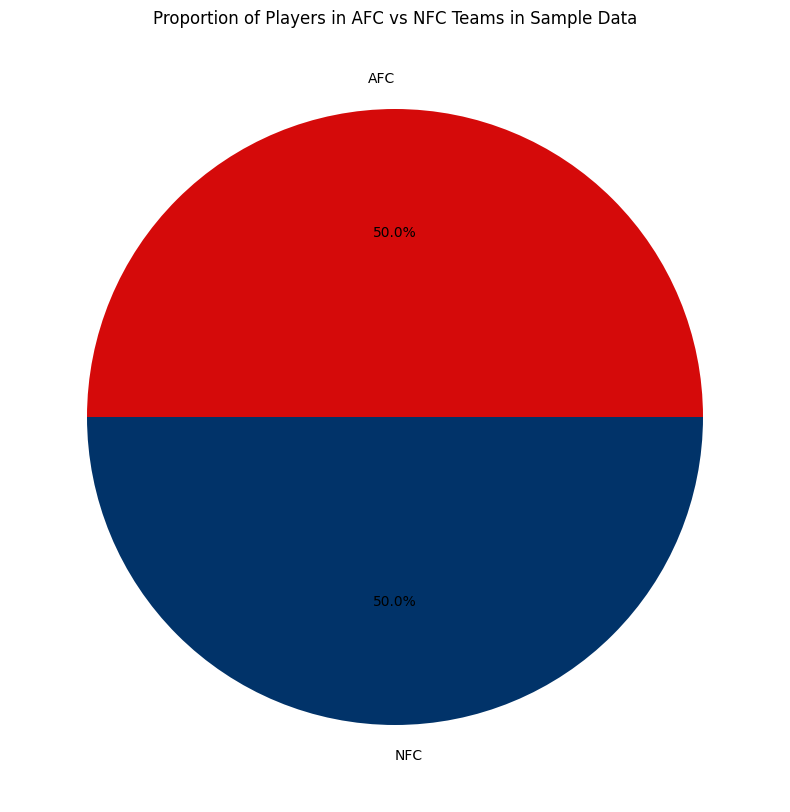

918.9666666666667
867.0333333333333


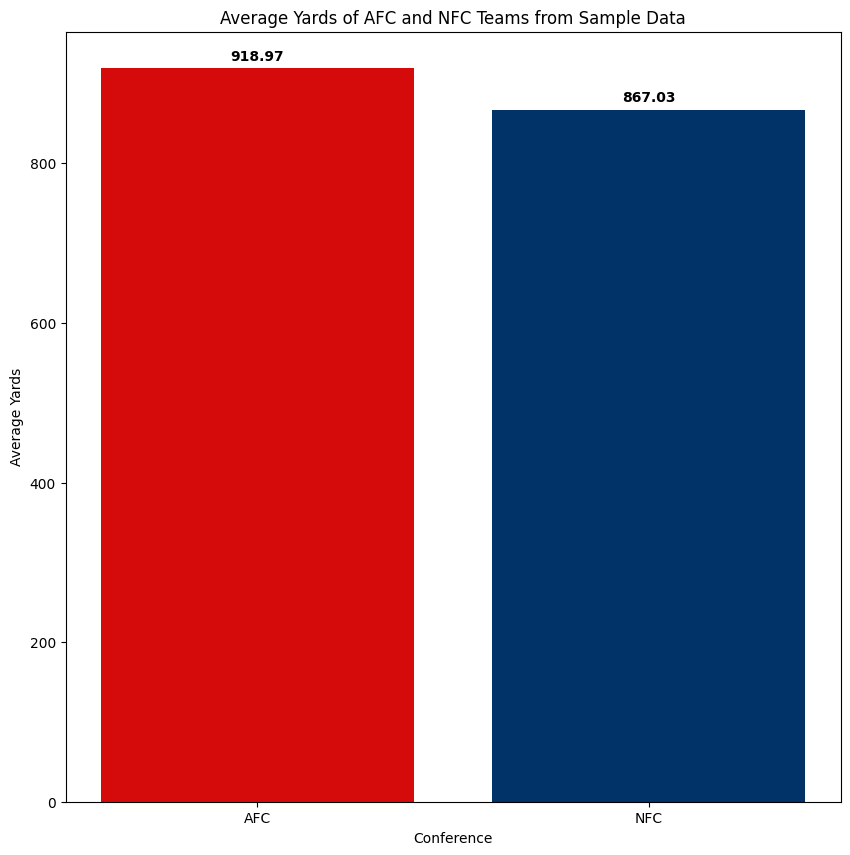

In [18]:
# Get all the unique teams and sort them
teams = new_df["Team"].unique()
teams.sort()

traded = sample_data.loc[new_df["Team"] == "2TM", ["Player", "Team", "Yds", "Year"]]

# change the team name from 2TM to the team the player was traded to
sample_data.loc[
    (sample_data["Player"] == "Kenyan Drake") & (sample_data["Team"] == "2TM"), "Team"
] = "ARI"

# Create a list of dictionaries for team colors and conferences
team_data = [
    {"team": "ARI", "color": "#97233F", "conference": "NFC", "division": "West"},
    {"team": "ATL", "color": "#A71930", "conference": "NFC", "division": "South"},
    {"team": "BAL", "color": "#241773", "conference": "AFC", "division": "North"},
    {"team": "BUF", "color": "#00338D", "conference": "AFC", "division": "East"},
    {"team": "CAR", "color": "#0085CA", "conference": "NFC", "division": "South"},
    {"team": "CHI", "color": "#00143F", "conference": "NFC", "division": "North"},
    {"team": "CIN", "color": "#FB4F14", "conference": "AFC", "division": "North"},
    {"team": "CLE", "color": "#311D00", "conference": "AFC", "division": "North"},
    {"team": "DAL", "color": "#041E42", "conference": "NFC", "division": "East"},
    {"team": "DEN", "color": "#002244", "conference": "AFC", "division": "West"},
    {"team": "DET", "color": "#046EB4", "conference": "NFC", "division": "North"},
    {"team": "GNB", "color": "#203731", "conference": "NFC", "division": "North"},
    {"team": "HOU", "color": "#03202F", "conference": "AFC", "division": "South"},
    {"team": "IND", "color": "#002C5F", "conference": "AFC", "division": "South"},
    {"team": "JAX", "color": "#006778", "conference": "AFC", "division": "South"},
    {"team": "KAN", "color": "#E31837", "conference": "AFC", "division": "West"},
    {"team": "LAC", "color": "#0080C6", "conference": "AFC", "division": "West"},
    {"team": "LAR", "color": "#002244", "conference": "NFC", "division": "West"},
    {"team": "STL", "color": "#002244", "conference": "NFC", "division": "West"},
    {"team": "LVR", "color": "#000000", "conference": "AFC", "division": "West"},
    {"team": "OAK", "color": "#000000", "conference": "AFC", "division": "West"},
    {"team": "MIA", "color": "#008E97", "conference": "AFC", "division": "East"},
    {"team": "MIN", "color": "#4F2683", "conference": "NFC", "division": "North"},
    {"team": "NWE", "color": "#002244", "conference": "AFC", "division": "East"},
    {"team": "NOR", "color": "#D3BC8D", "conference": "NFC", "division": "South"},
    {"team": "NYG", "color": "#0B2265", "conference": "NFC", "division": "East"},
    {"team": "NYJ", "color": "#125740", "conference": "AFC", "division": "East"},
    {"team": "PHI", "color": "#004C54", "conference": "NFC", "division": "East"},
    {"team": "PIT", "color": "#FFB612", "conference": "AFC", "division": "North"},
    {"team": "SEA", "color": "#69BE28", "conference": "NFC", "division": "West"},
    {"team": "SFO", "color": "#AA0000", "conference": "NFC", "division": "West"},
    {"team": "TAM", "color": "#D50A0A", "conference": "NFC", "division": "South"},
    {"team": "TEN", "color": "#4095D1", "conference": "AFC", "division": "South"},
    {"team": "WAS", "color": "#773141", "conference": "NFC", "division": "East"},
]

# Extract team colors and conferences
team_colors = {team["team"]: team["color"] for team in team_data}
conference_colors = {"AFC": "#D50A0A", "NFC": "#013369"}
afc_teams = [team["team"] for team in team_data if team["conference"] == "AFC"]
nfc_teams = [team["team"] for team in team_data if team["conference"] == "NFC"]

# Extract divisions
nfc_north = [team["team"] for team in team_data if team["conference"] == "NFC" and team["division"] == "North"]
nfc_south = [team["team"] for team in team_data if team["conference"] == "NFC" and team["division"] == "South"]
nfc_east = [team["team"] for team in team_data if team["conference"] == "NFC" and team["division"] == "East"]
nfc_west = [team["team"] for team in team_data if team["conference"] == "NFC" and team["division"] == "West"]
afc_north = [team["team"] for team in team_data if team["conference"] == "AFC" and team["division"] == "North"]
afc_south = [team["team"] for team in team_data if team["conference"] == "AFC" and team["division"] == "South"]
afc_east = [team["team"] for team in team_data if team["conference"] == "AFC" and team["division"] == "East"]
afc_west = [team["team"] for team in team_data if team["conference"] == "AFC" and team["division"] == "West"]


# seperate the players by conference
afc_df = sample_data[sample_data["Team"].isin(afc_teams)]
nfc_df = sample_data[sample_data["Team"].isin(nfc_teams)]

# create a pie chart of the afc and nfc teams
plt.figure(figsize=(10, 10))
plt.pie(
    [len(afc_df), len(nfc_df)],
    labels=["AFC", "NFC"],
    autopct="%1.1f%%",
    colors=[conference_colors["AFC"], conference_colors["NFC"]],
    center=(0, 0),
)
plt.title("Proportion of Players in AFC vs NFC Teams in Sample Data")
plt.savefig(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/reports/figures/afc_nfc_pie.png"
)
plt.show()

print(afc_df["Yds"].mean())
print(nfc_df["Yds"].mean())

# a bar chart of the average yards of afc and nfc teams
plt.figure(figsize=(10, 10))
plt.bar(
    ["AFC", "NFC"],
    [afc_df["Yds"].mean(), nfc_df["Yds"].mean()],
    color=[conference_colors["AFC"], conference_colors["NFC"]],
)
plt.xlabel("Conference")
plt.ylabel("Average Yards")
plt.title("Average Yards of AFC and NFC Teams from Sample Data")
plt.savefig(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/reports/figures/average_yards.png"
)
plt.text(0, afc_df["Yds"].mean()+10, round(afc_df["Yds"].mean(), 2), ha="center",fontweight='bold')
plt.text(1, nfc_df["Yds"].mean()+10, round(nfc_df["Yds"].mean(), 2), ha="center",fontweight='bold')
plt.show()

## ChPt #4 for Project - Name and Hypotheses of Inference Test

### Population Parameter - mean rushing yards per season NFC vs. AFC running backs per season

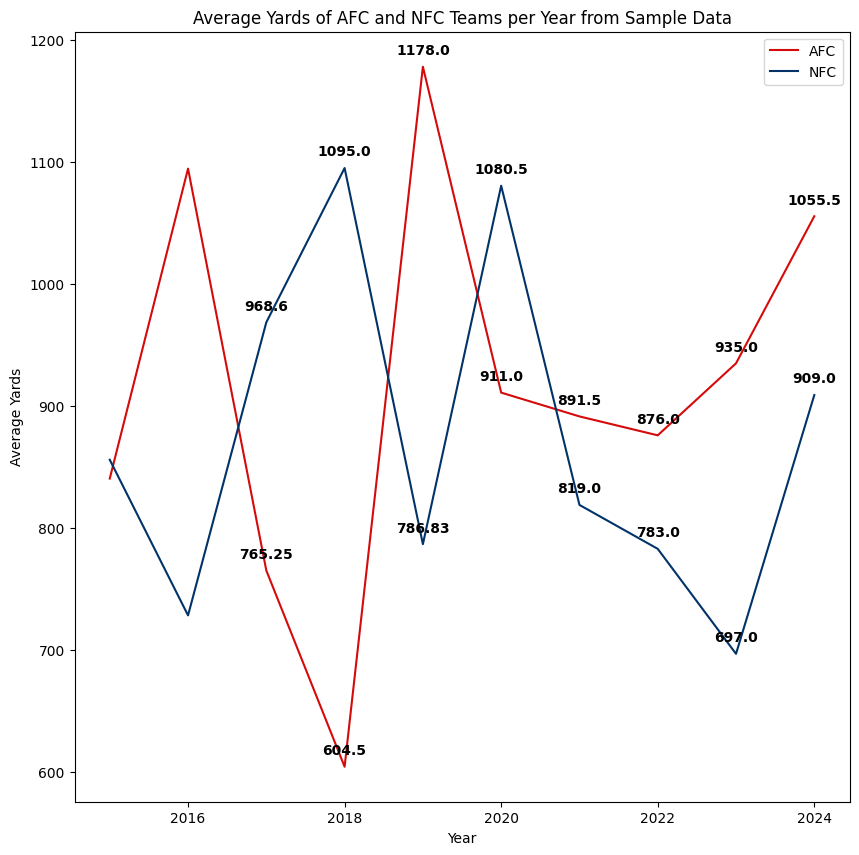

In [19]:
# AFC and NFC mean rushing yards per year
afc_mean_yds = []
nfc_mean_yds = []
years = sample_data["Year"].unique()
years.sort()

for year in years:
    afc_mean_yds.append(afc_df[afc_df["Year"] == year]["Yds"].mean())
    nfc_mean_yds.append(nfc_df[nfc_df["Year"] == year]["Yds"].mean())

# create a line chart of the average yards of afc and nfc teams per year
plt.figure(figsize=(10, 10))
plt.plot(years, afc_mean_yds, label="AFC", color=conference_colors["AFC"])
plt.plot(years, nfc_mean_yds, label="NFC", color=conference_colors["NFC"])
plt.xlabel("Year")
plt.ylabel("Average Yards")
plt.title("Average Yards of AFC and NFC Teams per Year from Sample Data")
plt.text(2024, afc_mean_yds[-1]+10, round(afc_mean_yds[-1], 2), ha="center",fontweight='bold')
plt.text(2024, nfc_mean_yds[-1]+10, round(nfc_mean_yds[-1], 2), ha="center",fontweight='bold')
plt.text(2023, afc_mean_yds[-2]+10, round(afc_mean_yds[-2], 2), ha="center",fontweight='bold')
plt.text(2023, nfc_mean_yds[-2]+10, round(nfc_mean_yds[-2], 2), ha="center",fontweight='bold')
plt.text(2022, afc_mean_yds[-3]+10, round(afc_mean_yds[-3], 2), ha="center",fontweight='bold')
plt.text(2022, nfc_mean_yds[-3]+10, round(nfc_mean_yds[-3], 2), ha="center",fontweight='bold')
plt.text(2021, afc_mean_yds[-4]+10, round(afc_mean_yds[-4], 2), ha="center",fontweight='bold')
plt.text(2021, nfc_mean_yds[-4]+10, round(nfc_mean_yds[-4], 2), ha="center",fontweight='bold')
plt.text(2020, afc_mean_yds[-5]+10, round(afc_mean_yds[-5], 2), ha="center",fontweight='bold')
plt.text(2020, nfc_mean_yds[-5]+10, round(nfc_mean_yds[-5], 2), ha="center",fontweight='bold')
plt.text(2019, afc_mean_yds[-6]+10, round(afc_mean_yds[-6], 2), ha="center",fontweight='bold')
plt.text(2019, nfc_mean_yds[-6]+10, round(nfc_mean_yds[-6], 2), ha="center",fontweight='bold')
plt.text(2018, afc_mean_yds[-7]+10, round(afc_mean_yds[-7], 2), ha="center",fontweight='bold')
plt.text(2018, nfc_mean_yds[-7]+10, round(nfc_mean_yds[-7], 2), ha="center",fontweight='bold')
plt.text(2017, afc_mean_yds[-8]+10, round(afc_mean_yds[-8], 2), ha="center",fontweight='bold')
plt.text(2017, nfc_mean_yds[-8]+10, round(nfc_mean_yds[-8], 2), ha="center",fontweight='bold')

plt.legend()
plt.savefig(
    "/Users/brianmoore/Documents/Data Science Portfolio/nfl-data-study/reports/figures/average_yards_per_year.png"
)
plt.show()

